In [4]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.optim
from torchvision.datasets import ImageFolder
import torch.optim as optim


ModuleNotFoundError: No module named 'torch'

In [1]:
from torch.utils.data import Dataset , DataLoader

ModuleNotFoundError: No module named 'torch'

In [ ]:
!pip install timm

In [ ]:
import timm

In [ ]:

import matplotlib.pyplot as plt # For data viz
import pandas as pd
import numpy as np
import sys
from tqdm.notebook import tqdm

In [2]:
! pip install kaggle


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/


! chmod 600 ~/.kaggle/kaggle.json

     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---- ----------------------------------- 10.2/82.7 kB ? eta -:--:--
     -------------- ----------------------- 30.7/82.7 kB 325.1 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/82.7 kB 325.1 kB/s eta 0:00:01
     -------------- ----------------------- 30.7/82.7 kB 325.1 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.7 kB 140.3 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.7 kB 140.3 kB/s eta 0:00:01
     ------------------ ------------------- 41.0/82.7 kB 140.3 kB/s eta 0:00:01
     ---------------------------- --------- 61.4/82.7 kB 163.6 kB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 193.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/78.2 kB ? eta -:--:--
   ----- ----------------------------------


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

NameError: name 'torch' is not defined

In [ ]:
device

'cuda'

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sidhantmanale","key":"b0fa3def82cf63e4eb9b834160591cd1"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset

 99% 1.67G/1.68G [00:24<00:00, 103MB/s]
100% 1.68G/1.68G [00:24<00:00, 74.0MB/s]


In [ ]:
import zipfile


with zipfile.ZipFile('/content/food-image-classification-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('target_directory')


In [ ]:
class food_data(Dataset):
  def __init__(self , data_dir , transform = None):
    self.data = ImageFolder(data_dir , transform = transform)

  def __len__(self):
    return len(self.data)

  def __getitem__(self , idx):
    return self.data[idx]

  def classes(self):
    return self.data.classes

In [ ]:
dataset1 = food_data(data_dir = '/content/target_directory/Food Classification dataset')

In [ ]:
num_classes = len(dataset1.classes())
num_data = dataset1.__len__()

In [ ]:
num_classes

34

In [ ]:
num_data

23873

In [ ]:
image , label = dataset1[2000]

In [ ]:
label

1

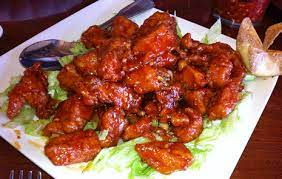

In [ ]:
image

In [ ]:
data_dir = '/content/target_directory/Food Classification dataset'
target_to_class = {v: k for k, v in ImageFolder(data_dir).class_to_idx.items()}
print(target_to_class)
classes = list(target_to_class.values())

{0: 'Baked Potato', 1: 'Crispy Chicken', 2: 'Donut', 3: 'Fries', 4: 'Hot Dog', 5: 'Sandwich', 6: 'Taco', 7: 'Taquito', 8: 'apple_pie', 9: 'burger', 10: 'butter_naan', 11: 'chai', 12: 'chapati', 13: 'cheesecake', 14: 'chicken_curry', 15: 'chole_bhature', 16: 'dal_makhani', 17: 'dhokla', 18: 'fried_rice', 19: 'ice_cream', 20: 'idli', 21: 'jalebi', 22: 'kaathi_rolls', 23: 'kadai_paneer', 24: 'kulfi', 25: 'masala_dosa', 26: 'momos', 27: 'omelette', 28: 'paani_puri', 29: 'pakode', 30: 'pav_bhaji', 31: 'pizza', 32: 'samosa', 33: 'sushi'}


In [ ]:
classes

['Baked Potato',
 'Crispy Chicken',
 'Donut',
 'Fries',
 'Hot Dog',
 'Sandwich',
 'Taco',
 'Taquito',
 'apple_pie',
 'burger',
 'butter_naan',
 'chai',
 'chapati',
 'cheesecake',
 'chicken_curry',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'ice_cream',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'omelette',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa',
 'sushi']

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])


In [ ]:
dataset = food_data(data_dir = '/content/target_directory/Food Classification dataset' , transform = transform)

In [ ]:
dataset.__len__()

23873

In [ ]:
image1 , label1 = dataset[0]

In [ ]:
image1.shape  , label

(torch.Size([3, 224, 224]), 1)

In [ ]:
for img , lab in dataset:
  break

In [ ]:
train_loader = DataLoader(dataset, batch_size = 32 , shuffle = True)

In [ ]:
train_loader

In [ ]:
for images , labels in train_loader:
  break

In [ ]:
images.shape , labels.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

In [ ]:
class food_classifier(nn.Module):
  def __init__(self , num_classes = 34):
    super(food_classifier , self).__init__()
    self.base_model = timm.create_model("resnet50", pretrained=True)
    self.features = nn.Sequential(*list(self.base_model.children())[:-1])

    resnet_out_size = 2048
    self.classifier = nn.Sequential(nn.Flatten() ,
                                    nn.Linear(resnet_out_size , num_classes))
  def forward(self , x):
    x = self.features(x)
    output = self.classifier(x)
    return output

In [ ]:
model = food_classifier(num_classes=34)
print(str(model)[:500])

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

food_classifier(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64


In [ ]:
example_out = model(images)


In [ ]:
example_out.shape # [batch_size, num_classes]

torch.Size([32, 34])

In [ ]:
criterion = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters() , lr = 000.1)

In [ ]:
criterion(example_out, labels)


tensor(3.5209, grad_fn=<NllLossBackward0>)

In [ ]:
print(example_out.shape, labels.shape)

torch.Size([32, 34]) torch.Size([32])


In [ ]:
num_epochs = 6
train_losses  = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = food_classifier(num_classes= 34)
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in tqdm(range(num_epochs)):
  model.train()
  running_loss = 0
  for images , labels in tqdm(train_loader , desc='Training loop'):
    images, labels = images.to(device), labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * labels.size(0)
  train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(train_loss)


  0%|          | 0/6 [00:00<?, ?it/s]

Training loop:   0%|          | 0/747 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Training loop:   0%|          | 0/747 [00:00<?, ?it/s]

Training loop:   0%|          | 0/747 [00:00<?, ?it/s]

Training loop:   0%|          | 0/747 [00:00<?, ?it/s]

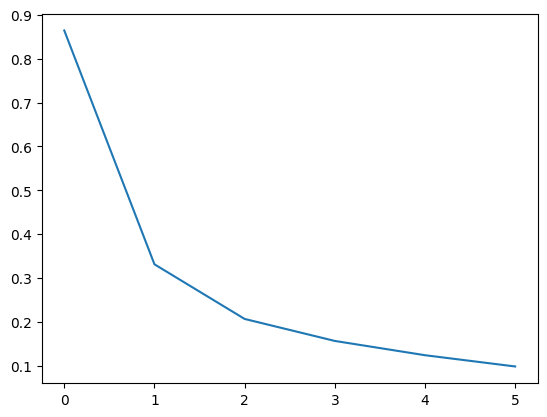

In [ ]:

    plt.plot(train_losses)

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


def preprocess_image(image_path, transform):
    image = Image.open(image_path).convert("RGB")
    return image, transform(image).unsqueeze(0)

def predict(model, image_tensor, device):
    model.eval()
    with torch.no_grad():
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
    return probabilities.cpu().numpy().flatten()


test_image = "/content/download (4).jpg"
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

original_image, image_tensor = preprocess_image(test_image, transform)
probabilities = predict(model, image_tensor, device)

class_output =  classes[probabilities.argmax()]




In [ ]:
import requests


api_key = '32fda24103594fa6b509f27a16296278'

def search_food_id(food_name):
    base_url = 'https://api.spoonacular.com/recipes/complexSearch'
    params = {
        'query': food_name,
        'number': 34,
        'apiKey': api_key
    }

    response = requests.get(base_url, params=params)

    if response.status_code == 200:
        data = response.json()
        if data['results']:
            return data['results'][0]['id']
    return None


food_name_id_dict = {}

for item in classes:
    food_name = item
    food_id = search_food_id(food_name)
    food_name_id_dict[food_name] = food_id




662744
Taco
Nutritional Information for Taco:
Calories: 190
Protein: 11g
Carbohydrates: N/A
Fat: 11g


The uploaded image belongs to the class : Taco 


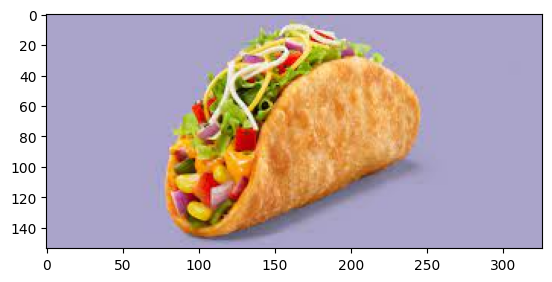

In [ ]:
import requests

api_key = '32fda24103594fa6b509f27a16296278'

def get_nutritional_info(recipe_id):
    base_url = f'https://api.spoonacular.com/recipes/{recipe_id}/nutritionWidget.json'

    params = {
        'apiKey': api_key
    }

    try:
        response = requests.get(base_url, params=params)

        if response.status_code == 200:
            nutritional_data = response.json()
            return nutritional_data

        print(f"Failed to retrieve nutritional information for recipe ID {recipe_id}")
        return None

    except Exception as e:
        print(f"An error occurred: {e}")
        return None


food_items = [
    {"name": "ice cream", "recipe_id": 647693}

]

plt.imshow(original_image)


class_output_str = str(class_output)


food_name = None



if class_output_str in food_name_id_dict:
  food_name = food_name_id_dict[class_output_str]
  recipe_id = food_name
  print(food_name)
  print(class_output)

  nutritional_info = get_nutritional_info(recipe_id)

  if nutritional_info:
    print(f"Nutritional Information for {class_output}:")
    print("Calories:", nutritional_info.get("calories", "N/A"))
    print("Protein:", nutritional_info.get("protein", "N/A"))
    print("Carbohydrates:", nutritional_info.get("carbohydrates", "N/A"))
    print("Fat:", nutritional_info.get("fat", "N/A"))
    print("\n")

else:

    food_name = "Unknown Food"

print(f"The uploaded image belongs to the class : {class_output.capitalize()} ")

In [ ]:
 classes

['Baked Potato',
 'Crispy Chicken',
 'Donut',
 'Fries',
 'Hot Dog',
 'Sandwich',
 'Taco',
 'Taquito',
 'apple_pie',
 'burger',
 'butter_naan',
 'chai',
 'chapati',
 'cheesecake',
 'chicken_curry',
 'chole_bhature',
 'dal_makhani',
 'dhokla',
 'fried_rice',
 'ice_cream',
 'idli',
 'jalebi',
 'kaathi_rolls',
 'kadai_paneer',
 'kulfi',
 'masala_dosa',
 'momos',
 'omelette',
 'paani_puri',
 'pakode',
 'pav_bhaji',
 'pizza',
 'samosa',
 'sushi']

In [ ]:

torch.save(model.state_dict(), 'food_image_classification_model.pth')



In [ ]:
files.download('food_image_classification_model.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>